In [8]:
"""
仿射变换是一种仅在二维平面中发生的几何变形，变换之后的图像仍然可以保持直线的“平直性”和“平行性”，
也就是说原来的直线变换之后还是直线，
平行线变换之后还是平行线。常见的仿射变换效果如图7.6所示，包含平移、旋转和倾斜
  新x = 原x × a + 原y × b + c
  新y = 原x × d + 原y × e + f
"""
import numpy as np
M = np.zeros((2, 3), np.float32)
M = np.float32([[1, 2, 3], [4, 5, 6]])


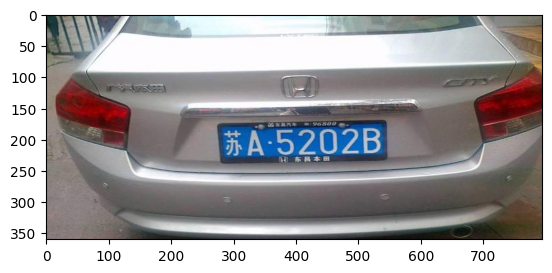

In [9]:
import matplotlib.pyplot as plt
import cv2
image=cv2.imread("../images/demo1.png")
rgbimg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgbimg)
plt.show()

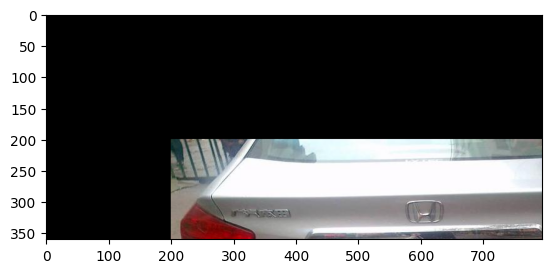

In [10]:
#图像平移M = [[1, 0, 水平移动的距离],[0, 1, 垂直移动的距离]]
M = np.float32([[1, 0, 200],[0, 1, 200]])     
dest =cv2.warpAffine(image,M=M,dsize=(len(image[0]),len(image)))
plt.imshow(cv2.cvtColor(dest, cv2.COLOR_BGR2RGB))
plt.show()


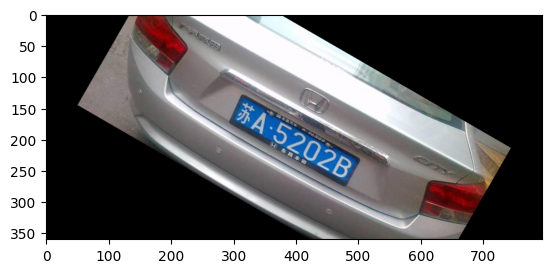

In [11]:
"""
让图像旋转也是通过M矩阵实现的，但得出这个矩阵需要做很复杂的运算，
于是OpenCV提供了getRotationMatrix2D()方法自动计算旋转图像的M矩阵。getRotationMatrix2D()方法的语法如下：
M = cv2.getRotationMatrix2D(center, angle, scale)
　center：旋转的中心点坐标。
　angle：旋转的角度（不是弧度）。正数表示逆时针旋转，负数表示顺时针旋转。,-30就表示顺时针转30度
　scale：缩放比例，浮点类型。如果取值1，表示图像保持原来的比例。 0.8表示缩小到80%
返回值说明：
　M：getRotationMatrix2D()方法计算出的仿射矩阵。
"""
center=(len(image[0])/2,len(image)/2)
M=cv2.getRotationMatrix2D(center,-30,0.8)
dest =cv2.warpAffine(image,M=M,dsize=(len(image[0]),len(image)))
plt.imshow(cv2.cvtColor(dest, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 倾斜让图像倾斜也是需要通过M矩阵实现的，但得出这个矩阵需要做很复杂的运算，
# 于是OpenCV提供了getAffineTransform()方法来自动计算倾斜图像的M矩阵。getRotationMatrix2D()方法的语法如下：
"""
参数说明：

　src：原图3个点坐标，格式为3行2列的32位浮点数列表，例如：[[0, 1], [1, 0], [1, 1]]。
　dst：倾斜图像的3个点坐标，格式与src一样。
返回值说明：
  注意opencv的坐标是（x,y)
　M：getAffineTransform()方法计算出的仿射矩阵。
"""
rows,cols=len(image),len(image[0])
src=np.float32([[0,0],[cols-1,0],[0,rows-1]])
dst=np.float32([[0,50],[cols-1,0],[0,rows-1]])
M=cv2.getAffineTransform(src,dst)
destImg =cv2.warpAffine(image,M=M,dsize=(len(image[0]),len(image)))
plt.imshow(cv2.cvtColor(destImg, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
#透视
"""
OpenCV中需要通过定位图像的4个点计算透视效果，4个点的位置如图7.16所示。
OpenCV根据这4个点的位置变化来计算其他像素的位置变化。透视效果不能保证图像的“平直性”和“平行性”。
　src：原始图像。
　M：一个3行3列的矩阵，根据此矩阵的值变换原图中的像素位置。
　dsize：输出图像的尺寸大小。
　flags：可选参数，插值方式，建议使用默认值。
　borderMode：可选参数，边界类型，建议使用默认值。
　borderValue：可选参数，边界值，默认为0，建议使用默认值。
返回值说明：

　dst：经过透视变换后输出图像。
"""


